In [ ]:
import numpy as np
import pandas as pd
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AAIC_Assignments/solving/8_Behavior_of_Linear_Models/task_b.csv')
data=data.iloc[:,1:]

In [ ]:
data.head()

,f1,f2,f3,y
0,-195.871045,-14843.084171,5.532140,1.0
1,-1217.183964,-4068.124621,4.416082,1.0
2,9.138451,4413.412028,0.425317,0.0
3,363.824242,15474.760647,1.094119,0.0
4,-768.812047,-7963.932192,1.870536,0.0


In [ ]:
data.corr()['y']

f1    0.067172
f2   -0.017944
f3    0.839060
y     1.000000
Name: y, dtype: float64

In [ ]:
data.std()

f1      488.195035
f2    10403.417325
f3        2.926662
y         0.501255
dtype: float64

In [ ]:
X=data[['f1','f2','f3']].values
Y=data['y'].values
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


# What if our features are with different variance 

<pre>
* <b>As part of this task you will observe how linear models work in case of data having feautres with different variance</b>
* <b>from the output of the above cells you can observe that var(F2)>>var(F1)>>Var(F3)</b>

> <b>Task1</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' and check the feature importance

> <b>Task2</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance

</pre>

<h3><font color='blue'> Make sure you write the observations for each task, why a particular feautre got more importance than others</font></h3>

# **Task1:**
**1.** Apply Logistic regression(SGDClassifier with logloss) on 'data' and check the feature importance

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import sklearn

Feature: 0, Score: -1481.82595
Feature: 1, Score: 14346.68384
Feature: 2, Score: 10505.38569


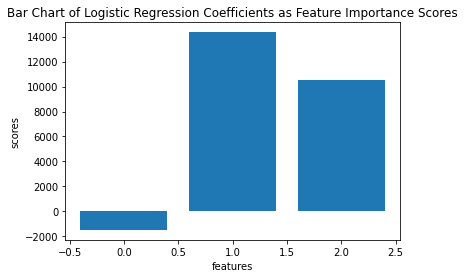

In [ ]:
model_log_reg = sklearn.linear_model.SGDClassifier(loss='log', random_state=0)
model_log_reg.fit(X, Y)

#importance = Weights assigned to the features.
importance = model_log_reg.coef_[0]

for i, v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title("Bar Chart of Logistic Regression Coefficients as Feature Importance Scores")
plt.xlabel("features")
plt.ylabel("scores")
plt.show()

# Observation:
weight(Feature1) > weight(Feature2) > weiight(Feature0) Feature1 is most important, then Feature2 and then Feature0

## 2. Apply SVM(SGDClassifier with hinge) on 'data' and check the feature importance

Feature: 0, Score: 10127.95323
Feature: 1, Score: 14938.46440
Feature: 2, Score: 10232.76549


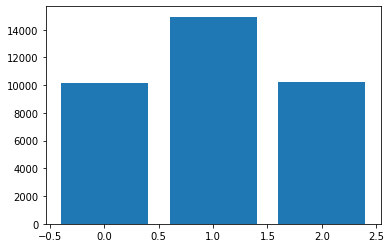

In [ ]:
model_svm = sklearn.linear_model.SGDClassifier(loss='hinge', random_state=0)
model_svm.fit(X, Y)

#importance = Weights assigned to the features.
importance = model_svm.coef_[0]

for i, v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Observation:

weight(feature1) > weight(feature2) == weight(feature0); 

 Feature1 is most important and then feature2 and then feature0


 - I am not sure whether it's right assumption !!! 
     we can see that there is a lot of difference of weight of Feature value of F1. It may be due to 
* When applying logistic regression on high-range values of data, the model may be less effective due to the fact that the logistic function used in logistic regression has a limited output range of 0 to 1. High-range values can cause the input to the logistic function to become extremely large or small, resulting in saturation at the limits of the output range. This can lead to reduced model accuracy, and make it difficult to converge on a solution during training. To address this issue, it is common to scale the input data to a smaller range, such as [-1, 1], to ensure that the inputs to the logistic function remain within a suitable range.

# **Task2:**

    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' after standardization 
    
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
X_scaled = scaled_data[['f1', 'f2', 'f3']].values
Y_scaled = scaled_data['y'].values

Feature: 0, Score: 1.67993
Feature: 1, Score: 0.45236
Feature: 2, Score: 9.61807


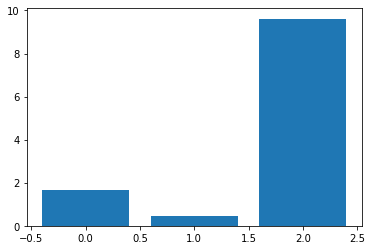

In [ ]:
model_log_reg = sklearn.linear_model.SGDClassifier(loss='log', random_state=0)
model_log_reg.fit(X_scaled, Y_scaled)

importance = model_log_reg.coef_[0]
#importance = Weights assigned to the features.

for i, v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

weight(Feature2) > weight(Feature0) > weight(Feature1) 

the most important feature after scale is **Feature2** but before scale **Feature1 **was most important becasue values are in higher range before scale.

    2. Apply SVM(SGDClassifier with hinge) on 'data' after standardization 

     i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance

Feature: 0, Score: 0.08724
Feature: 1, Score: 0.46596
Feature: 2, Score: 9.98070


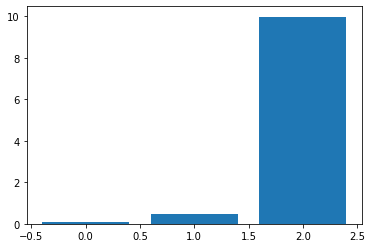

In [ ]:
model_svm = sklearn.linear_model.SGDClassifier(loss='hinge', random_state=0)
model_svm.fit(X_scaled, Y_scaled)
importance = model_svm.coef_[0]
for i, v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

   Observation:

 weight(Feature2) > weight(Feature1) > weight(Feature0) the most important feature after scale is Feature 2 but before scale Feature1 was most important

Higher the absolute value of a feature weight, more is its importance.

In [ ]:
overall observation:
